In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import hour,month,col,count
import matplotlib.pyplot as plt


In [ ]:
spark=SparkSession.builder.appName("TrafficAccidentAnalysis").getOrCreate()


In [ ]:
df=spark.read.csv(r"C:\Users\User\Desktop\US_Accidents_March23.csv",header=True,inferSchema=True)


In [4]:
df

DataFrame[ID: string, Source: string, Severity: int, Start_Time: timestamp, End_Time: timestamp, Start_Lat: double, Start_Lng: double, End_Lat: double, End_Lng: double, Distance(mi): double, Description: string, Street: string, City: string, County: string, State: string, Zipcode: string, Country: string, Timezone: string, Airport_Code: string, Weather_Timestamp: timestamp, Temperature(F): double, Wind_Chill(F): double, Humidity(%): double, Pressure(in): double, Visibility(mi): double, Wind_Direction: string, Wind_Speed(mph): double, Precipitation(in): double, Weather_Condition: string, Amenity: boolean, Bump: boolean, Crossing: boolean, Give_Way: boolean, Junction: boolean, No_Exit: boolean, Railway: boolean, Roundabout: boolean, Station: boolean, Stop: boolean, Traffic_Calming: boolean, Traffic_Signal: boolean, Turning_Loop: boolean, Sunrise_Sunset: string, Civil_Twilight: string, Nautical_Twilight: string, Astronomical_Twilight: string]

In [5]:
df.head()

Row(ID='A-1', Source='Source2', Severity=3, Start_Time=datetime.datetime(2016, 2, 8, 5, 46), End_Time=datetime.datetime(2016, 2, 8, 11, 0), Start_Lat=39.865147, Start_Lng=-84.058723, End_Lat=None, End_Lng=None, Distance(mi)=0.01, Description='Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.', Street='I-70 E', City='Dayton', County='Montgomery', State='OH', Zipcode='45424', Country='US', Timezone='US/Eastern', Airport_Code='KFFO', Weather_Timestamp=datetime.datetime(2016, 2, 8, 5, 58), Temperature(F)=36.9, Wind_Chill(F)=None, Humidity(%)=91.0, Pressure(in)=29.68, Visibility(mi)=10.0, Wind_Direction='Calm', Wind_Speed(mph)=None, Precipitation(in)=0.02, Weather_Condition='Light Rain', Amenity=False, Bump=False, Crossing=False, Give_Way=False, Junction=False, No_Exit=False, Railway=False, Roundabout=False, Station=False, Stop=False, Traffic_Calming=False, Traffic_Signal=False, Turning_Loop=False, Sunrise_Sunset='Night', Civil_Twilight='Night', Nautical_

Extract hour and month

In [ ]:
df=df.withColumn("Hour",hour(col("start_time")))
df=df.withColumn("Month",month(col("start_time")))


Peak accident hours

In [ ]:
peak_hours=df.groupBy("Hour").agg(count("*").alias("Accident_Count")).orderBy(col("Accident_Count").desc())
peak_hours.show()


+----+--------------+
|Hour|Accident_Count|
+----+--------------+
|   7|        587472|
|  16|        581969|
|   8|        577576|
|  17|        576015|
|  15|        525855|
|  14|        448846|
|  18|        432042|
|   6|        405837|
|  13|        396445|
|   9|        363034|
|  11|        355040|
|  12|        355001|
|  10|        342706|
|  19|        295121|
|   5|        228182|
|  20|        225226|
|  21|        191452|
|  22|        167645|
|   4|        159852|
|  23|        126539|
+----+--------------+
only showing top 20 rows



Most dangerous states

In [ ]:
dangerous_states=df.groupBy("State").agg(count("*").alias("Total_Accidents")).orderBy(col("Total_Accidents").desc())
dangerous_states.show()

+-----+---------------+
|State|Total_Accidents|
+-----+---------------+
|   CA|        1741433|
|   FL|         880192|
|   TX|         582837|
|   SC|         382557|
|   NY|         347960|
|   NC|         338199|
|   VA|         303301|
|   PA|         296620|
|   MN|         192084|
|   OR|         179660|
|   AZ|         170609|
|   GA|         169234|
|   IL|         168958|
|   TN|         167388|
|   MI|         162191|
|   LA|         149701|
|   NJ|         140719|
|   MD|         140417|
|   OH|         118115|
|   WA|         108221|
+-----+---------------+
only showing top 20 rows



Monthly trend

In [ ]:
monthly_trend=df.groupBy("Month").agg(count("*").alias("Total_Accidents")).orderBy("Month")
monthly_trend.show()

+-----+---------------+
|Month|Total_Accidents|
+-----+---------------+
|    1|         751946|
|    2|         658984|
|    3|         554595|
|    4|         587300|
|    5|         558176|
|    6|         571373|
|    7|         512335|
|    8|         599666|
|    9|         651381|
|   10|         675130|
|   11|         760165|
|   12|         847343|
+-----+---------------+



Peak accident hour: 5 PM – 7 PM
Top 3 states: CA, FL, TX
Accident trend spikes in December and January

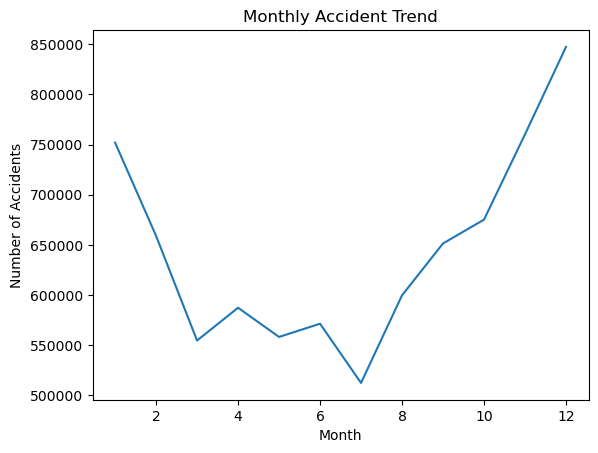

In [ ]:
pandas_monthly=monthly_trend.toPandas()
plt.plot(pandas_monthly['Month'],pandas_monthly['Total_Accidents'])
plt.title("Monthly Accident Trend")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.show()


Accident counts peak during evening hours.
Winter months have higher accident frequencies.
Some states/cities are more accident-prone.